In [1]:
def update_progress(n,max_value):
    ''' Create a progress bar
    
    Args:
        n (int): current count
        max_value (int): ultimate values
    
    '''
    import sys
    barLength = 20 # Modify this to change the length of the progress bar
    status = ""
    progress = np.round(float(n/max_value),decimals=2)
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    #if progress >= 1.:
    #    progress = 1
    #    status = "Done...\r\n"
    if n == max_value:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    text = "\r{0}% ({1} of {2}): |{3}|  {4}".format(np.round(progress*100,decimals=1), 
                                                  n, 
                                                  max_value, 
                                                  "#"*block + "-"*(barLength-block), 
                                                  status)
    sys.stdout.write(text)
    sys.stdout.flush()

def MonteCarloIt(thing, N = 10000):
    ''' 
    Generate a random sample of size = N from a 
    Gaussian centered at thing[0] with std thing[1]
    
    Args:
        thing (tuple, flt): tuple of (value,uncertainty).  Can be either astropy units object \
            or float
        N (int): number of samples
    Returns:
        array: N random samples from a Gaussian.

    Written by Logan Pearce, 2020
    '''
    try:
        out = np.random.normal(thing[0].value,thing[1].value,N)
    except:
        out = np.random.normal(thing[0],thing[1],N)

    return out

In [3]:
import pickle
Amag_SDSS,e_Amag_SDSS,Cmag_SDSS,e_Cmag_SDSS = pickle.load(open('SDSS-magnitudes-noatm.pkl','rb'))

Cmag_SDSS_dict = {'z':Cmag_SDSS[0],'i':Cmag_SDSS[1],'r':Cmag_SDSS[2],'g':Cmag_SDSS[3]}
e_Cmag_SDSS_dict = {'z':e_Cmag_SDSS[0],'i':e_Cmag_SDSS[1],'r':e_Cmag_SDSS[2],'g':e_Cmag_SDSS[3]}

Amag_SDSS_dict = {'z':Amag_SDSS[0],'i':Amag_SDSS[1],'r':Amag_SDSS[2],'g':Amag_SDSS[3]}
e_Amag_SDSS_dict = {'z':e_Amag_SDSS[0],'i':e_Amag_SDSS[1],'r':e_Amag_SDSS[2],'g':e_Amag_SDSS[3]}

CRminusI = MonteCarloIt([Cmag_SDSS_dict['r'],e_Cmag_SDSS_dict['r']]) - \
            MonteCarloIt([Cmag_SDSS_dict['i'],e_Cmag_SDSS_dict['i']])
CGminusR = MonteCarloIt([Cmag_SDSS_dict['g'],e_Cmag_SDSS_dict['g']]) - \
            MonteCarloIt([Cmag_SDSS_dict['r'],e_Cmag_SDSS_dict['r']])

ARminusI = MonteCarloIt([Amag_SDSS_dict['r'],e_Amag_SDSS_dict['r']]) - \
            MonteCarloIt([Amag_SDSS_dict['i'],e_Amag_SDSS_dict['i']])
AGminusR = MonteCarloIt([Amag_SDSS_dict['g'],e_Amag_SDSS_dict['g']]) - \
            MonteCarloIt([Amag_SDSS_dict['r'],e_Amag_SDSS_dict['r']])

Adistance = [220,2]

C_Mr = MonteCarloIt([Cmag_SDSS_dict['r'],e_Cmag_SDSS_dict['r']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
A_Mr = MonteCarloIt([Amag_SDSS_dict['r'],e_Amag_SDSS_dict['r']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
C_Mg = MonteCarloIt([Cmag_SDSS_dict['g'],e_Cmag_SDSS_dict['g']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
A_Mg = MonteCarloIt([Amag_SDSS_dict['g'],e_Amag_SDSS_dict['g']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
C_Mi = MonteCarloIt([Cmag_SDSS_dict['i'],e_Cmag_SDSS_dict['i']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
A_Mi = MonteCarloIt([Amag_SDSS_dict['i'],e_Amag_SDSS_dict['i']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
C_Mz = MonteCarloIt([Cmag_SDSS_dict['z'],e_Cmag_SDSS_dict['z']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
A_Mz = MonteCarloIt([Amag_SDSS_dict['z'],e_Amag_SDSS_dict['z']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5


CM = [np.mean(C_Mg),np.mean(C_Mr),np.mean(C_Mi),np.mean(C_Mz)]
eCM = [np.std(C_Mg),np.std(C_Mr),np.std(C_Mi),np.std(C_Mz)]
MIST_filter_columnnames = ['SDSS_g','SDSS_r','SDSS_i','SDSS_z']

Ccolorlist = [np.mean(CRminusI),np.mean(CGminusR)]
Cecolorlist = [np.std(CRminusI),np.std(CGminusR)]
MIST_color_columnnames = ['r-i','g-r']

AM = [np.mean(A_Mg),np.mean(A_Mr),np.mean(A_Mi),np.mean(A_Mz)]
eAM = [np.std(A_Mg),np.std(A_Mr),np.std(A_Mi),np.std(A_Mz)]

Acolorlist = [np.mean(ARminusI),np.mean(AGminusR)]
Aecolorlist = [np.std(ARminusI),np.std(AGminusR)]

mhs = [-4.00,-3.00,-2.00,-1.50,-1.00,-0.50,-0.25,0.00,0.50]
mhs_strings = []
for i in range(len(mhs)):
    string = str(mhs[i])
    if '-' in string:
        string = string.replace('-','m')
    else:
        string = 'p'+string
    string += '0'
    mhs_strings.append(string)
mhs_strings[6] = mhs_strings[6].replace('m0.250','m0.25')

# Best fitting model C:

m4.00 52.001799290747556
m3.00 45.541236128176706
m2.00 33.564369017302354
m1.50 27.148004617284613
m1.00 18.208501737264804
m0.50 6.550836673512053
p0.00 4.412841637323932
p0.50 3.289579681943277


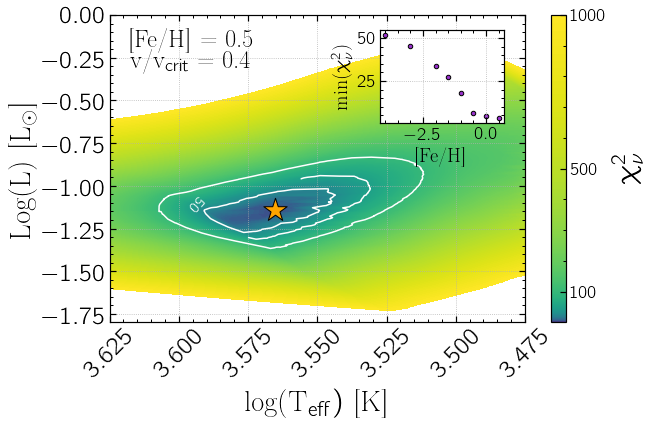

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
directory = 'MIST_v1.2_vvcrit0.4_SDSSugriz-synth-phot/'

mhs = [-4.00,-3.00,-2.00,-1.50,-1.00,-0.50,0.00,0.50]
mhs_strings = []
for i in range(len(mhs)):
    string = str(mhs[i])
    if '-' in string:
        string = string.replace('-','m')
    else:
        string = 'p'+string
    string += '0'
    mhs_strings.append(string)
mhs_strings[6] = mhs_strings[6].replace('m0.250','m0.25')

mh_chi2s = []

for i in range(len(mhs_strings)):
    string = mhs_strings[i]
    file = 'MIST_v1.2_vvcrit0.4_SDSSugriz-synth-phot/MIST_v1.2_feh_'+string+\
        '_afe_p0.0_vvcrit0.4_SDSSugriz.iso.cmd--chi2-output-C.csv'
    mist = pd.read_csv(file)
    print(string,np.min(mist['chi2'])/6)
    mh_chi2s.append(np.min(mist['chi2'])/6)


directory = 'MIST_v1.2_vvcrit0.4_SDSSugriz-synth-phot/'
C_best_mist = pd.read_csv(directory+'MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_SDSSugriz.iso.cmd--chi2-output-C.csv')
mist = C_best_mist
ind = np.argsort(mist['chi2'])

import matplotlib
from matplotlib.ticker import LogLocator, LogFormatter
l_f = LogFormatter(10)


plt.style.use('magrathea')
%matplotlib inline
plt.figure(figsize = (9,6))
plt.grid(ls=':')
levels = np.linspace(0,1000,1000)
im = plt.tricontourf(mist['log_Teff'], mist['log_L'], mist['chi2']/5, levels = levels, cmap = 'viridis', 
                norm=matplotlib.colors.LogNorm())
cbarticks = [100,500,1000]
cbar = plt.colorbar(im,ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = plt.tricontour(mist['log_Teff'], mist['log_L'], mist['chi2']/5, levels = clevels, 
               colors=['w']*len(levels))
plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

plt.scatter(mist['log_Teff'][ind[0]], mist['log_L'][ind[0]], color='orange', marker = '*',s=600, zorder=10, 
            edgecolors = 'black')

plt.annotate('[Fe/H] = 0.5',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
plt.annotate('v/v$_\mathrm{crit}$ = 0.4',xy = (0.05,0.83), xycoords = 'axes fraction', fontsize=25)

plt.xlim(3.475,3.625)
plt.ylim(-1.8,0)
plt.gca().invert_xaxis()
cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
plt.xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
plt.xticks(fontsize=25, rotation=45)
plt.ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
plt.yticks(fontsize=25)

######################## inset axes #######
ax = plt.gca()
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(mhs, mh_chi2s, marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('[Fe/H]')
axins.set_ylabel(r'min($\chi_\nu^2$)')


plt.tight_layout()

#plt.savefig('MIST_models_chi2MAP_C_primaryas_M0V-mh_p05_wchi2plot.png', dpi=300, bbox_inches = 'tight')

# A

In [8]:
mhs = [-4.00,-3.00,-2.00,-1.50,-1.00,-0.50,-0.25, 0.00,0.50]
mhs_strings = []
for i in range(len(mhs)):
    string = str(mhs[i])
    if '-' in string:
        string = string.replace('-','m')
    else:
        string = 'p'+string
    string += '0'
    mhs_strings.append(string)
mhs_strings[6] = mhs_strings[6].replace('m0.250','m0.25')

mh_chi2s = []

for i in range(len(mhs_strings)):
    string = mhs_strings[i]
    file = 'MIST_v1.2_vvcrit0.4_SDSSugriz-synth-phot/MIST_v1.2_feh_'+string+\
        '_afe_p0.0_vvcrit0.4_SDSSugriz.iso.cmd--chi2-output-A.csv'
    mist = pd.read_csv(file)
    print(string,np.min(mist['chi2'])/5)
    mh_chi2s.append(np.min(mist['chi2'])/5)


i=5
string = mhs_strings[i]
file = 'MIST_v1.2_vvcrit0.4_SDSSugriz-synth-phot/MIST_v1.2_feh_'+string+\
        '_afe_p0.0_vvcrit0.4_SDSSugriz.iso.cmd--chi2-output-A.csv'
A_best_mist = pd.read_csv(file)
mist = A_best_mist
ind = np.argsort(mist['chi2'])

import matplotlib
from matplotlib.ticker import LogLocator, LogFormatter
l_f = LogFormatter(10)


plt.style.use('magrathea')
%matplotlib inline
plt.figure(figsize = (9,6))
plt.grid(ls=':')
levels = np.linspace(0,1000,1000)
im = plt.tricontourf(mist['log_Teff'], mist['log_L'], mist['chi2']/5, levels = levels, cmap = 'viridis', 
                norm=matplotlib.colors.LogNorm())
cbarticks = [100,500,1000]
cbar = plt.colorbar(im,ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = plt.tricontour(mist['log_Teff'], mist['log_L'], mist['chi2']/5, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

plt.scatter(mist['log_Teff'][ind[0]]-0.0015, mist['log_L'][ind[0]], color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')

plt.annotate('[Fe/H] = '+string.replace('m','-'),xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
plt.annotate('v/v$_\mathrm{crit}$ = 0.4',xy = (0.05,0.83), xycoords = 'axes fraction', fontsize=25)

plt.xlim(3.575,3.9)
plt.ylim(0.0,0.75)
plt.gca().invert_xaxis()
cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
plt.xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
plt.xticks(fontsize=25, rotation=45)
plt.ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
plt.yticks(fontsize=25)

######################## inset axes #######
ax = plt.gca()
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(mhs, mh_chi2s, marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('[Fe/H]')
axins.set_ylabel(r'min($\chi_\nu^2$)')
axins.set_xlim(left=-2.5)


plt.tight_layout()

#plt.savefig('MIST_models_chi2MAP_A_primaryas_M0V-mh_m05_wchi2plot.png',dpi=300,bbox_inches = 'tight')

m4.00 3.4789791483688433
m3.00 1.9063577652563235
m2.00 4.400273643945484
m1.50 2.4828531966913987
m1.00 0.5008523711991304
m0.50 0.26210414005969795
m0.25 0.28472461272119765
p0.00 0.6652934847766814
p0.50 3.75541263035901


<IPython.core.display.Javascript object>

In [9]:
AM = [np.mean(A_Mg),np.mean(A_Mr),np.mean(A_Mi),np.mean(A_Mz)]
eAM = [np.std(A_Mg),np.std(A_Mr),np.std(A_Mi),np.std(A_Mz)]

Acolorlist = [np.mean(ARminusI),np.mean(AGminusR)]
Aecolorlist = [np.std(ARminusI),np.std(AGminusR)]

# Combine plots

(0.7, 1.5)

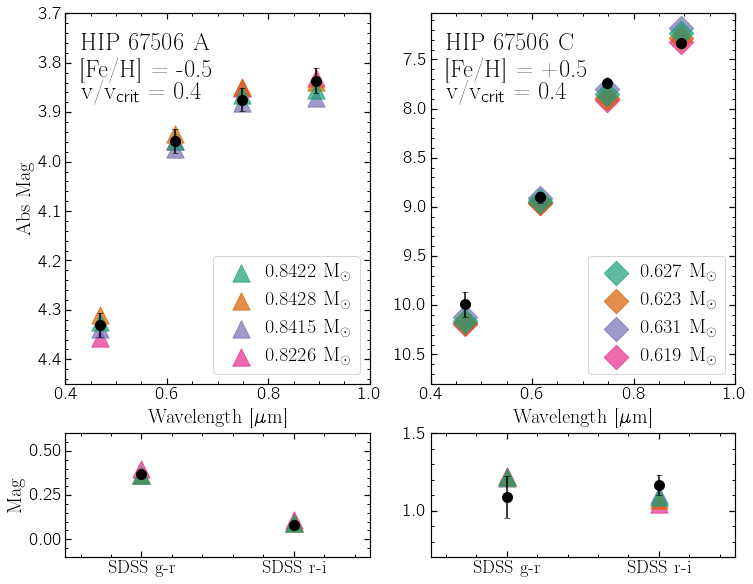

In [11]:
from matplotlib.gridspec import GridSpec
SDSS_filters = {'z':0.8931,'i':0.7481,'r':0.6165,'g':.4686}
f = [SDSS_filters['g'],SDSS_filters['r'],SDSS_filters['i'],SDSS_filters['z']]

C_ind = np.argsort(C_best_mist['chi2'])
A_ind = np.argsort(A_best_mist['chi2'])


N = 8
cmap = matplotlib.cm.get_cmap('Dark2')
colors = cmap(np.linspace(0,1,N))

%matplotlib inline
fig = plt.figure(figsize=(12,10))
gs = GridSpec(nrows = 2, ncols = 2, height_ratios=[3, 1], width_ratios = [1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])

ax3 = fig.add_subplot(gs[1])
ax4 = fig.add_subplot(gs[3])

alpha = 0.7
for i in range(4):
    for j in range(4)[::-1]:
        if i == 0:
            ax1.scatter(f[i],A_best_mist[MIST_filter_columnnames[i]].loc[A_ind[j]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.4f}'.format(A_best_mist['star_mass'][A_ind[j]].item()) + ' M$_\odot$'
                        , zorder=8)
        else:
            ax1.scatter(f[i],A_best_mist[MIST_filter_columnnames[i]].loc[A_ind[j]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)

color = 'black'
for i in range(4):
    ax1.scatter(f[i],AM[i], zorder=10, color=color, s=100)
    ax1.errorbar(f[i],AM[i],yerr = eAM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
    
ax1.invert_yaxis()
ax1.set_xlim(0.4,1)
ax1.set_ylim(bottom = 4.45, top = 3.7)
ax1.set_ylabel('Abs Mag')
ax1.set_xlabel('Wavelength [$\mu$m]')

ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('[Fe/H] = -0.5',xy = (0.05,0.83), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('v/v$_\mathrm{crit}$ = 0.4',xy = (0.05,0.77), xycoords = 'axes fraction', fontsize=25)

handles, labels = ax1.get_legend_handles_labels()
A_legend = ax1.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=20)





alpha = 0.7
for i in range(4):
    for j in range(4)[::-1]:
        if i == 0:
            ax3.scatter(f[i],C_best_mist[MIST_filter_columnnames[i]].loc[C_ind[j]], 
                    color=colors[j], marker='D', s=300, alpha = alpha, 
                    label='{:.3f}'.format(C_best_mist['star_mass'][C_ind[j]].item()) + ' M$_\odot$'
                        , zorder=8)
        else:
            ax3.scatter(f[i],C_best_mist[MIST_filter_columnnames[i]].loc[C_ind[j]], 
                    color=colors[j], marker='D', s=300, alpha = alpha)
color = 'black'
for i in range(4):
    ax3.scatter(f[i],CM[i], zorder=10, color=color, s=100)
    ax3.errorbar(f[i],CM[i],yerr = eCM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)

handles, labels = ax3.get_legend_handles_labels()
C_legend = ax3.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=20)   

ax3.invert_yaxis()
ax3.set_ylim(bottom = 10.8)
ax3.set_xlim(0.4,1)
ax3.set_xlabel('Wavelength [$\mu$m]')
ax3.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax3.annotate('[Fe/H] = +0.5',xy = (0.05,0.83), xycoords = 'axes fraction', fontsize=25)
ax3.annotate('v/v$_\mathrm{crit}$ = 0.4',xy = (0.05,0.77), xycoords = 'axes fraction', fontsize=25)
            
                   
zorder = [8,6,4,2]

i = 1
ax2.scatter(0,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(0,Acolorlist[i],yerr = Aecolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 0
ax2.scatter(1,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(1,Acolorlist[i],yerr = Aecolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ax2.scatter(0,A_best_mist[MIST_color_columnnames[1]].loc[A_ind[j]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
for j in range(4):
    ax2.scatter(1,A_best_mist[MIST_color_columnnames[0]].loc[A_ind[j]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
        
ax2.set_xlim(-0.5,1.5)
ax2.set_ylim(-0.1,0.6)
ax2.set_ylabel('Mag')
ax2.set_xticks([0,1], labels = ['SDSS '+MIST_color_columnnames[::-1][k] for k in range(2)])


zorder = [8,6,4,2]
i = 1
ax4.scatter(0,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(0,Ccolorlist[i],yerr = Cecolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 0
ax4.scatter(1,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(1,Ccolorlist[i],yerr = Cecolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ax4.scatter(0,C_best_mist[MIST_color_columnnames[1]].loc[C_ind[j]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
for j in range(4):
    ax4.scatter(1,C_best_mist[MIST_color_columnnames[0]].loc[C_ind[j]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
        

ax4.set_xticks([0,1], labels = ['SDSS '+MIST_color_columnnames[::-1][k] for k in range(2)])
ax4.set_xlim(-0.5,1.5)
ax4.set_ylim(0.7,1.5)

#plt.savefig('MIST-photometry-color-fitting.png',dpi=300, bbox_inches='tight')


# CMD

In [12]:
j = 0
A_teff_chimin = A_best_mist['log_Teff'].loc[A_ind[j]]
A_lum_chimin = A_best_mist['log_L'].loc[A_ind[j]]
A_age_chimin = A_best_mist['log10_isochrone_age_yr'].loc[A_ind[j]]
A_mass_chimin = A_best_mist['star_mass'].loc[A_ind[j]]

j = 0
C_teff_chimin = C_best_mist['log_Teff'].loc[C_ind[j]]
C_lum_chimin = C_best_mist['log_L'].loc[C_ind[j]]
C_age_chimin = C_best_mist['log10_isochrone_age_yr'].loc[C_ind[j]]
C_mass_chimin = C_best_mist['star_mass'].loc[C_ind[j]]

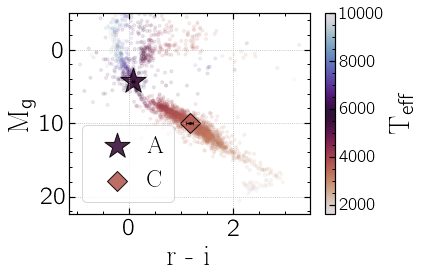

In [13]:
rminusiplot_hip,gminusrplot_hip,Mgplot_hip,Mrplot_hip,teffplot_hip,sptypeplot_hip = pickle.load(
            open('carmenes-hip-landolt-colors.pkl','rb'))

cmap = 'twilight_r'

import matplotlib

cmap = matplotlib.cm.get_cmap(cmap)
percent = (10**C_teff_chimin - np.nanmin(teffplot_hip)) / np.nanmax(teffplot_hip)
Ccolor = cmap(percent)
percent = (10**A_teff_chimin - np.nanmin(teffplot_hip)) / np.nanmax(teffplot_hip)
Acolor = cmap(percent)


%matplotlib inline
plt.scatter(rminusiplot_hip,Mgplot_hip, 
         marker='.',ls='None',alpha=0.1, c = teffplot_hip, cmap = cmap)
cbar = plt.colorbar()
cbar.set_label(r'T$_{\mathrm{eff}}$',fontsize=30)
cbar.set_alpha(1)
cbar.draw_all()

plt.scatter(np.mean(ARminusI),np.nanmean(A_Mg),
           marker = '*', color=Acolor,s=700, label='A',alpha=0.9, edgecolor='black')
plt.errorbar(np.mean(ARminusI),np.nanmean(A_Mg), xerr = np.std(ARminusI), yerr = np.nanstd(A_Mg),
           ls='None', color='black',capsize = 2, lw=1)

plt.scatter(np.mean(CRminusI),np.nanmean(C_Mg),
           marker = 'D', color=Ccolor,s=200, label='C',alpha=0.9, edgecolor='black')
plt.errorbar(np.mean(CRminusI),np.nanmean(C_Mg), xerr = np.std(CRminusI), yerr = np.nanstd(C_Mg),
           ls='None', color='black',capsize = 2, lw=1)

#plt.xlim(-0.5,3.5)

plt.xlabel('r - i',fontsize = 30)
plt.ylabel('M$_\mathrm{g}$',fontsize = 30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.gca().invert_yaxis()
plt.ylim(top = -5)
plt.grid(ls=':')
plt.legend(fontsize=25)
#plt.title('CARMENES Sample CMD')
plt.tight_layout()
#plt.savefig("CARMENES_HIP_cmd_teff_primaryas_K7V-MIST-fits.png", dpi=300)

# Ev tracks:

## A

<IPython.core.display.Javascript object>


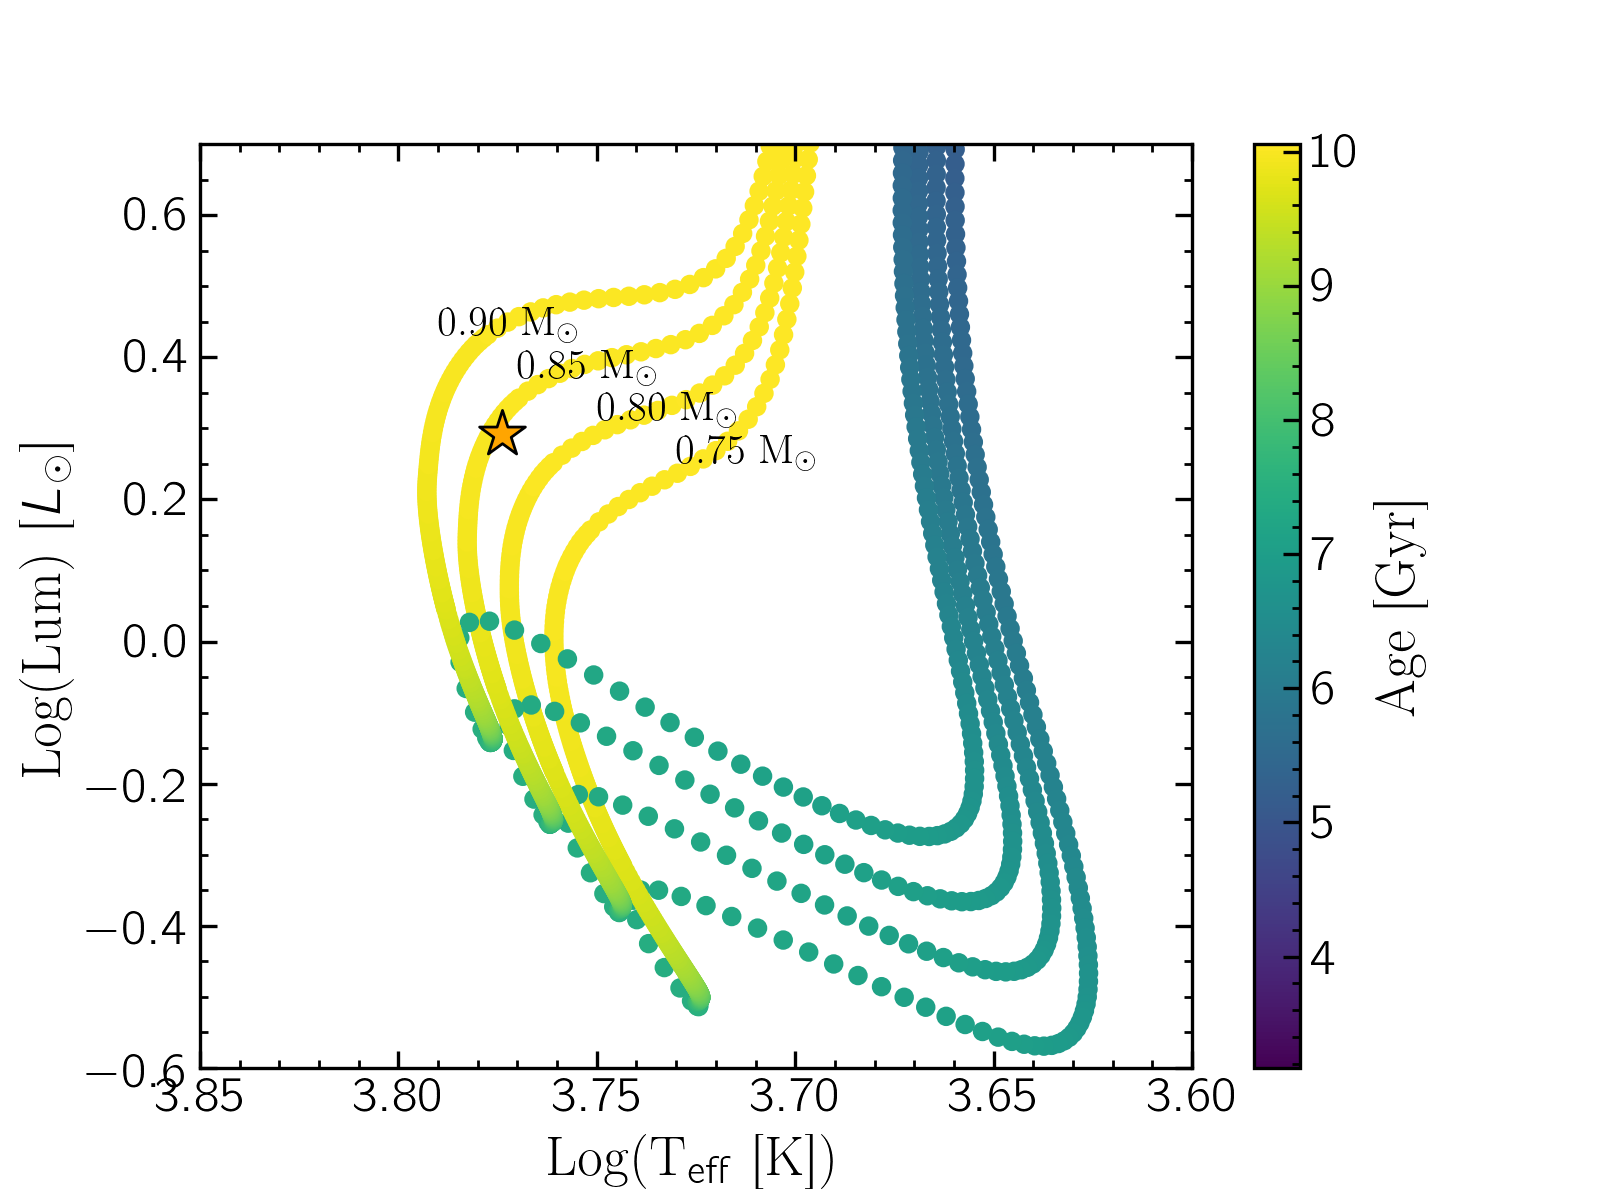

In [36]:
directory = 'MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS/'
os.system('ls '+directory+'* > list')
with open('list') as z:
    ff = z.read().splitlines()
Amasses = ['0.75','0.80','0.85','0.90'][::-1]
tracks = []
for f in ff:
    for i in range(len(Amasses)):
        if Amasses[i].replace('0.','000') in f:
            tracks.append(f)
#MistTrack064 = pd.read_table('MIST-evtrack-0006400M-mh-m15.track.eep', delim_whitespace=True, header=11)
A_MistTrack = pd.read_table(tracks[0], delim_whitespace=True, header=11)
columns = A_MistTrack.columns[1:]

x_label_offsets = [0,-0.02,-0.04,-0.06]
y_label_offsets = [0,-0.06,-0.12,-0.18]

%matplotlib notebook
cmap = 'viridis'
for i,track in enumerate(tracks):
    A_MistTrack = pd.read_table(track, delim_whitespace=True, names=columns, comment='#')
    ind = np.where(np.log10(A_MistTrack['star_age']) < 10.5)[0]
    plt.scatter(A_MistTrack['log_Teff'][ind],A_MistTrack['log_L'][ind], 
            c=np.log10(A_MistTrack['star_age'][ind]), cmap=cmap)
    plt.annotate(Amasses[i]+' M$_\odot$',
                 xy=(3.79+x_label_offsets[i], 0.43+y_label_offsets[i]),
                 xycoords = 'data', fontsize=15)
    
cbar = plt.colorbar()
plt.scatter(A_teff_chimin,A_lum_chimin, marker='*', color='orange',s=300, edgecolor='black')


plt.ylim(-0.6,0.7)
plt.xlim(3.60,3.85)
plt.gca().invert_xaxis()
plt.xlabel('Log(T$_\mathrm{eff}$ [K])')
plt.ylabel('Log(Lum) [$L_\odot$]')
cbar.set_label(r'Age [Gyr]')

## C

<IPython.core.display.Javascript object>


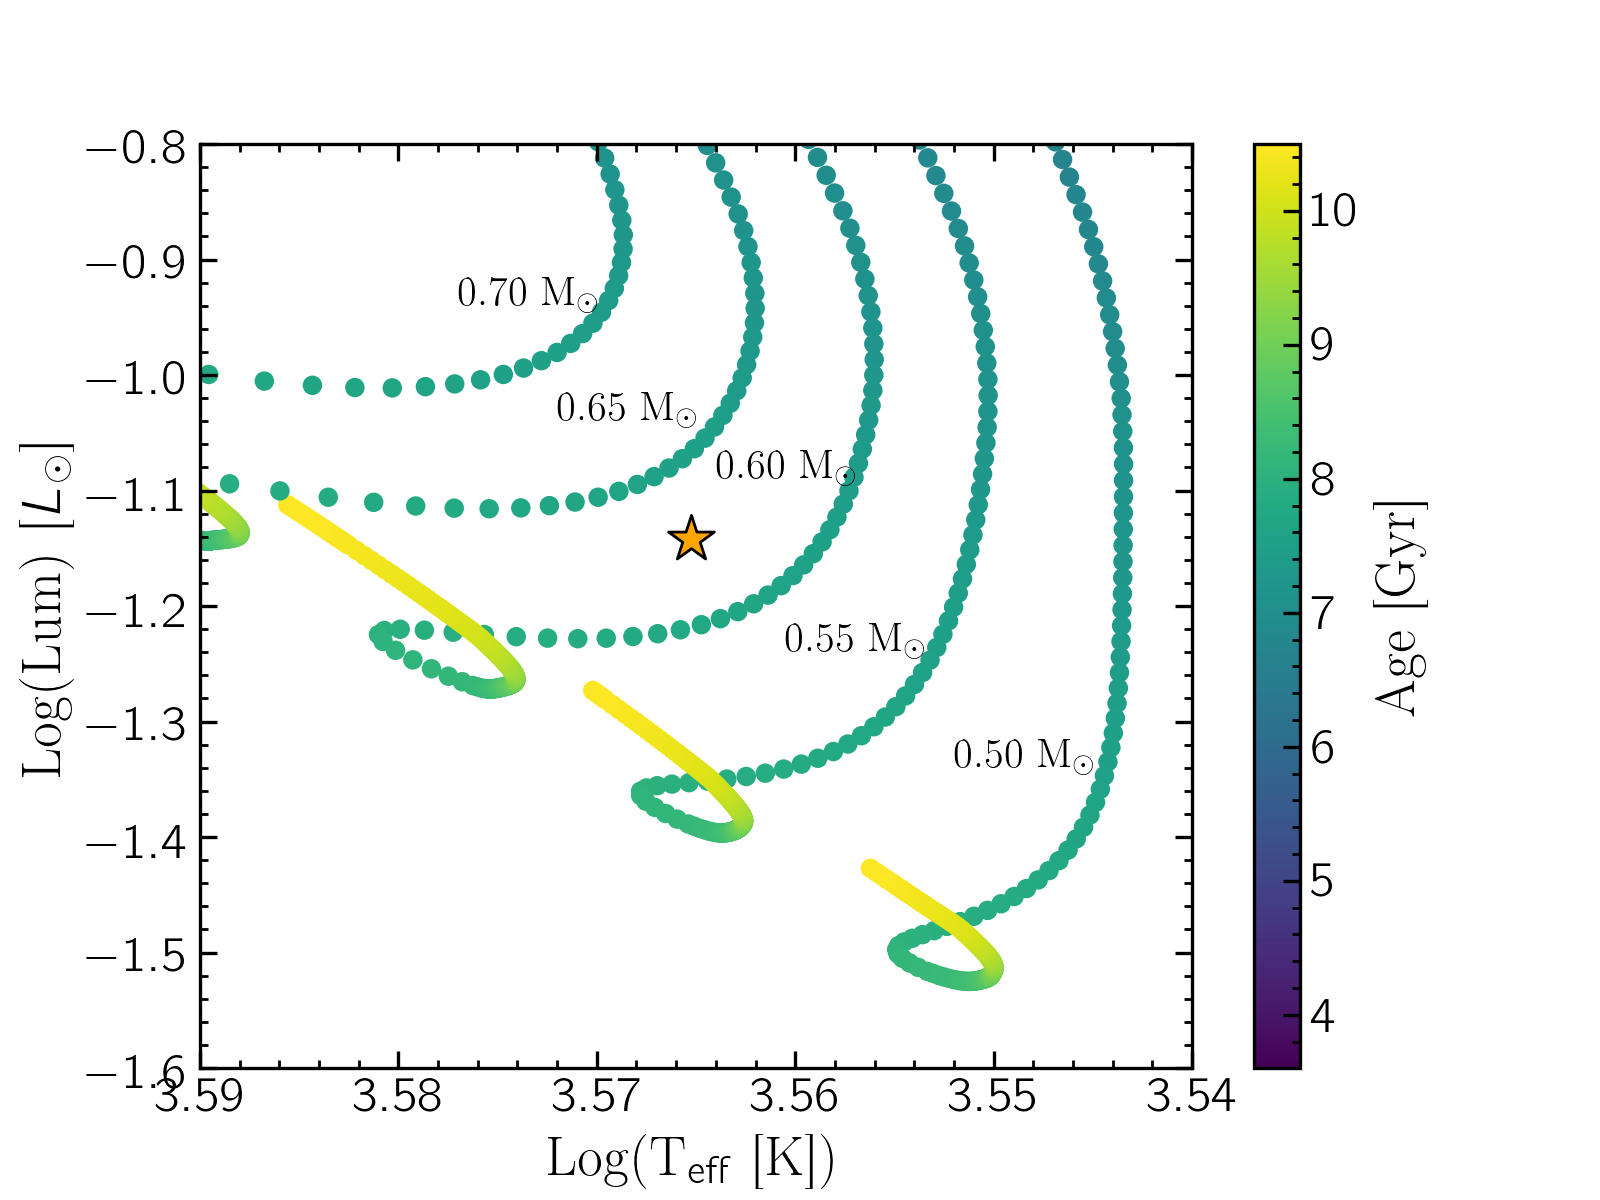

In [37]:
directory = 'MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS/'
os.system('ls '+directory+'* > list')
with open('list') as z:
    ff = z.read().splitlines()
Cmasses = ['0.50','0.55','0.60','0.65','0.70'][::-1]
tracks = []
for f in ff:
    for i in range(len(Cmasses)):
        if Cmasses[i].replace('0.','000') in f:
            tracks.append(f)
#MistTrack064 = pd.read_table('MIST-evtrack-0006400M-mh-m15.track.eep', delim_whitespace=True, header=11)
C_MistTrack = pd.read_table(tracks[0], delim_whitespace=True, header=11)
columns = C_MistTrack.columns[1:]

x_label_offsets = [0,-0.005,-0.013,-0.0165,-0.025]
y_label_offsets = [0,-0.1,-0.15,-0.3,-0.4]

%matplotlib inline
cmap = 'viridis'
for i,track in enumerate(tracks):
    C_MistTrack = pd.read_table(track, delim_whitespace=True, names=columns, comment='#')
    ind = np.where(np.log10(C_MistTrack['star_age']) < 10.5)[0]
    plt.scatter(C_MistTrack['log_Teff'][ind],C_MistTrack['log_L'][ind], 
            c=np.log10(C_MistTrack['star_age'][ind]), cmap=cmap)
    plt.annotate(Cmasses[i]+' M$_\odot$',
                 xy=(3.577+x_label_offsets[i], -0.94+y_label_offsets[i]),
                 xycoords = 'data', fontsize=15)
cbar = plt.colorbar()
plt.scatter(C_teff_chimin,C_lum_chimin, marker='*', color='orange',s=300, edgecolor='black')
plt.ylim(-1.6,-0.8)
plt.xlim(3.54,3.59)
plt.gca().invert_xaxis()
plt.xlabel('Log(T$_\mathrm{eff}$ [K])')
plt.ylabel('Log(Lum) [$L_\odot$]')
cbar.set_label(r'Age [Gyr]')

# A & C best fits are two different ages!

# Constraining age to be the same

In [14]:
#pickle.dump([ages_mins,chimins],open('ages-chimins-from-keeping-age-constrained.pkl','wb'))
#pickle.dump([Cmist_temp,Amist_temp],open('bestfit-MIST-age-models-from-keeping-age-constrained.pkl','wb'))
ages_mins,chimins = pickle.load(open('ages-chimins-from-keeping-age-constrained.pkl','rb'))
Cmist_temp,Amist_temp = pickle.load(open('bestfit-MIST-age-models-from-keeping-age-constrained.pkl','rb'))
A_best_mist = Amist_temp
C_best_mist = Cmist_temp
bestage = '7.15'
ff = 'chi2-matrix-constrainedage-'+bestage+'.npy'
summedchi = np.load(ff)

A_index_min = np.where(summedchi == np.min(summedchi))[1][0]
C_index_min = np.where(summedchi == np.min(summedchi))[0][0]

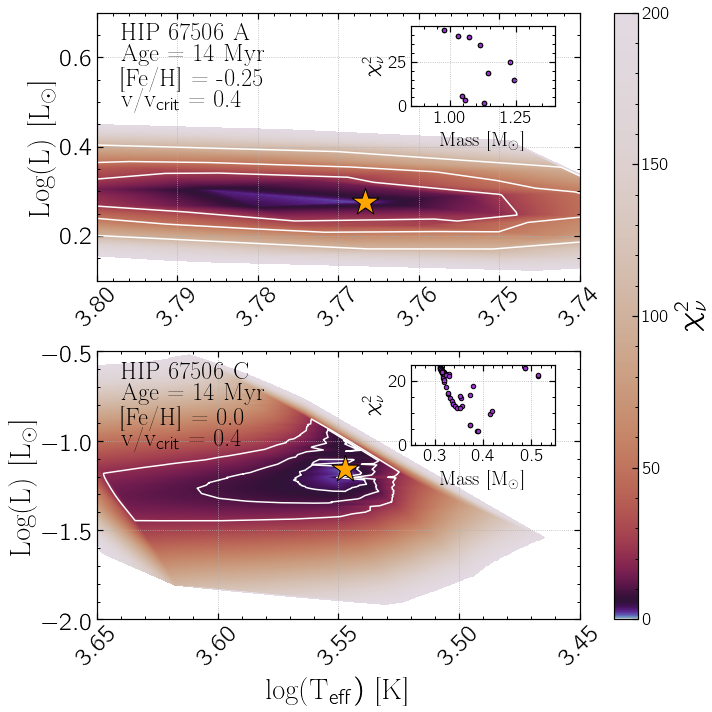

In [15]:
import matplotlib
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.gridspec import GridSpec
l_f = LogFormatter(10)

cmap = 'twilight'


plt.style.use('magrathea')
%matplotlib inline
fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows = 2, ncols = 2, width_ratios = [1, 0.05], height_ratios = [1,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
cax = fig.add_subplot(gs[:,1])
#ax_main = 

ax1.grid(ls=':')
levels = np.linspace(0,200,1000)
im = ax1.tricontourf(Amist_temp['log_Teff'], Amist_temp['log_L'], Amist_temp['chi2']/6, 
                     levels = levels, cmap = cmap, 
                norm=matplotlib.colors.LogNorm())
cbarticks = [0,50,100,150,200]
#cbar = plt.colorbar(im, ticks=cbarticks, ax=cax)
#fig.colorbar(im, ax=[ax1,ax2])
cbar = fig.colorbar(im, cax=cax, ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = ax1.tricontour(Amist_temp['log_Teff'], Amist_temp['log_L'], Amist_temp['chi2']/6, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

ax1.scatter(Amist_temp['log_Teff'][A_index_min], Amist_temp['log_L'][A_index_min], color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')

ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('Age = '+str(int(np.round(
                    (10**(Amist_temp['log10_isochrone_age_yr'].loc[A_index_min])/1e6), 
                    decimals=0))) + ' Myr',
             xy = (0.05,0.82), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('[Fe/H] = '+str(Amist_temp['feh'].loc[A_index_min]),
             xy = (0.05,0.73), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('v/v$_\mathrm{crit}$ = '+str(Amist_temp['vvcrit'].loc[A_index_min])
             ,xy = (0.05,0.65), xycoords = 'axes fraction', fontsize=25)

ax1.set_xlim(3.74,3.80)
ax1.set_ylim(0.1,0.7)
ax1.invert_xaxis()
cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
#ax1.set_xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
ax1.tick_params(axis='x', labelsize=25, rotation=45)
#plt.xticks(fontsize=25, rotation=45)
ax1.set_ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
#plt.yticks(fontsize=25)
ax1.tick_params(axis='y', labelsize=25)

######################## inset axes #######
ax = ax1
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(Amist_temp['star_mass'], Amist_temp['chi2']/5, 
              marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('Mass [M$_\odot$]')
axins.set_ylabel(r'$\chi_\nu^2$')
axins.set_xlim(0.85,1.4)
axins.set_ylim(0,45)

##################################### ax2
ax2.grid(ls=':')
levels = np.linspace(0,1000,1000)
im = ax2.tricontourf(Cmist_temp['log_Teff'], Cmist_temp['log_L'], Cmist_temp['chi2']/6, 
                     levels = levels, cmap = cmap, 
                norm=matplotlib.colors.LogNorm())
#cbarticks = [100,500,1000]
#cbar = plt.colorbar(im,ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = ax2.tricontour(Cmist_temp['log_Teff'], Cmist_temp['log_L'], Cmist_temp['chi2']/6, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

ax2.scatter(Cmist_temp['log_Teff'][C_index_min], Cmist_temp['log_L'][C_index_min], color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')

ax2.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax2.annotate('Age = '+str(int(np.round(
                    (10**(Cmist_temp['log10_isochrone_age_yr'].loc[C_index_min])/1e6), 
                    decimals=0))) + ' Myr',
             xy = (0.05,0.82), xycoords = 'axes fraction', fontsize=25)
ax2.annotate('[Fe/H] = '+str(Cmist_temp['feh'].loc[C_index_min]),
             xy = (0.05,0.73), xycoords = 'axes fraction', fontsize=25)
ax2.annotate('v/v$_\mathrm{crit}$ = '+str(Cmist_temp['vvcrit'].loc[C_index_min])
             ,xy = (0.05,0.65), xycoords = 'axes fraction', fontsize=25)

ax2.set_xlim(3.45,3.65)
ax2.set_ylim(-2,-0.5)
ax2.invert_xaxis()
#cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
ax2.set_xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
ax2.tick_params(axis='x', labelsize=25, rotation=45)
ax2.set_ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
ax2.tick_params(axis='y', labelsize=25)

######################## inset axes #######
ax = ax2
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(Cmist_temp['star_mass'], Cmist_temp['chi2']/6, 
              marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('Mass [M$_\odot$]')
axins.set_ylabel(r'$\chi_\nu^2$')
axins.set_xlim(0.25,0.55)
axins.set_ylim(0,25)
             


plt.tight_layout()

#plt.savefig('MIST_models_chi2MAP_BOTH_primaryas_M0V-mh_m05_wchi2plot-WAgesConstrained.png',dpi=300,bbox_inches = 'tight')

<IPython.core.display.Javascript object>


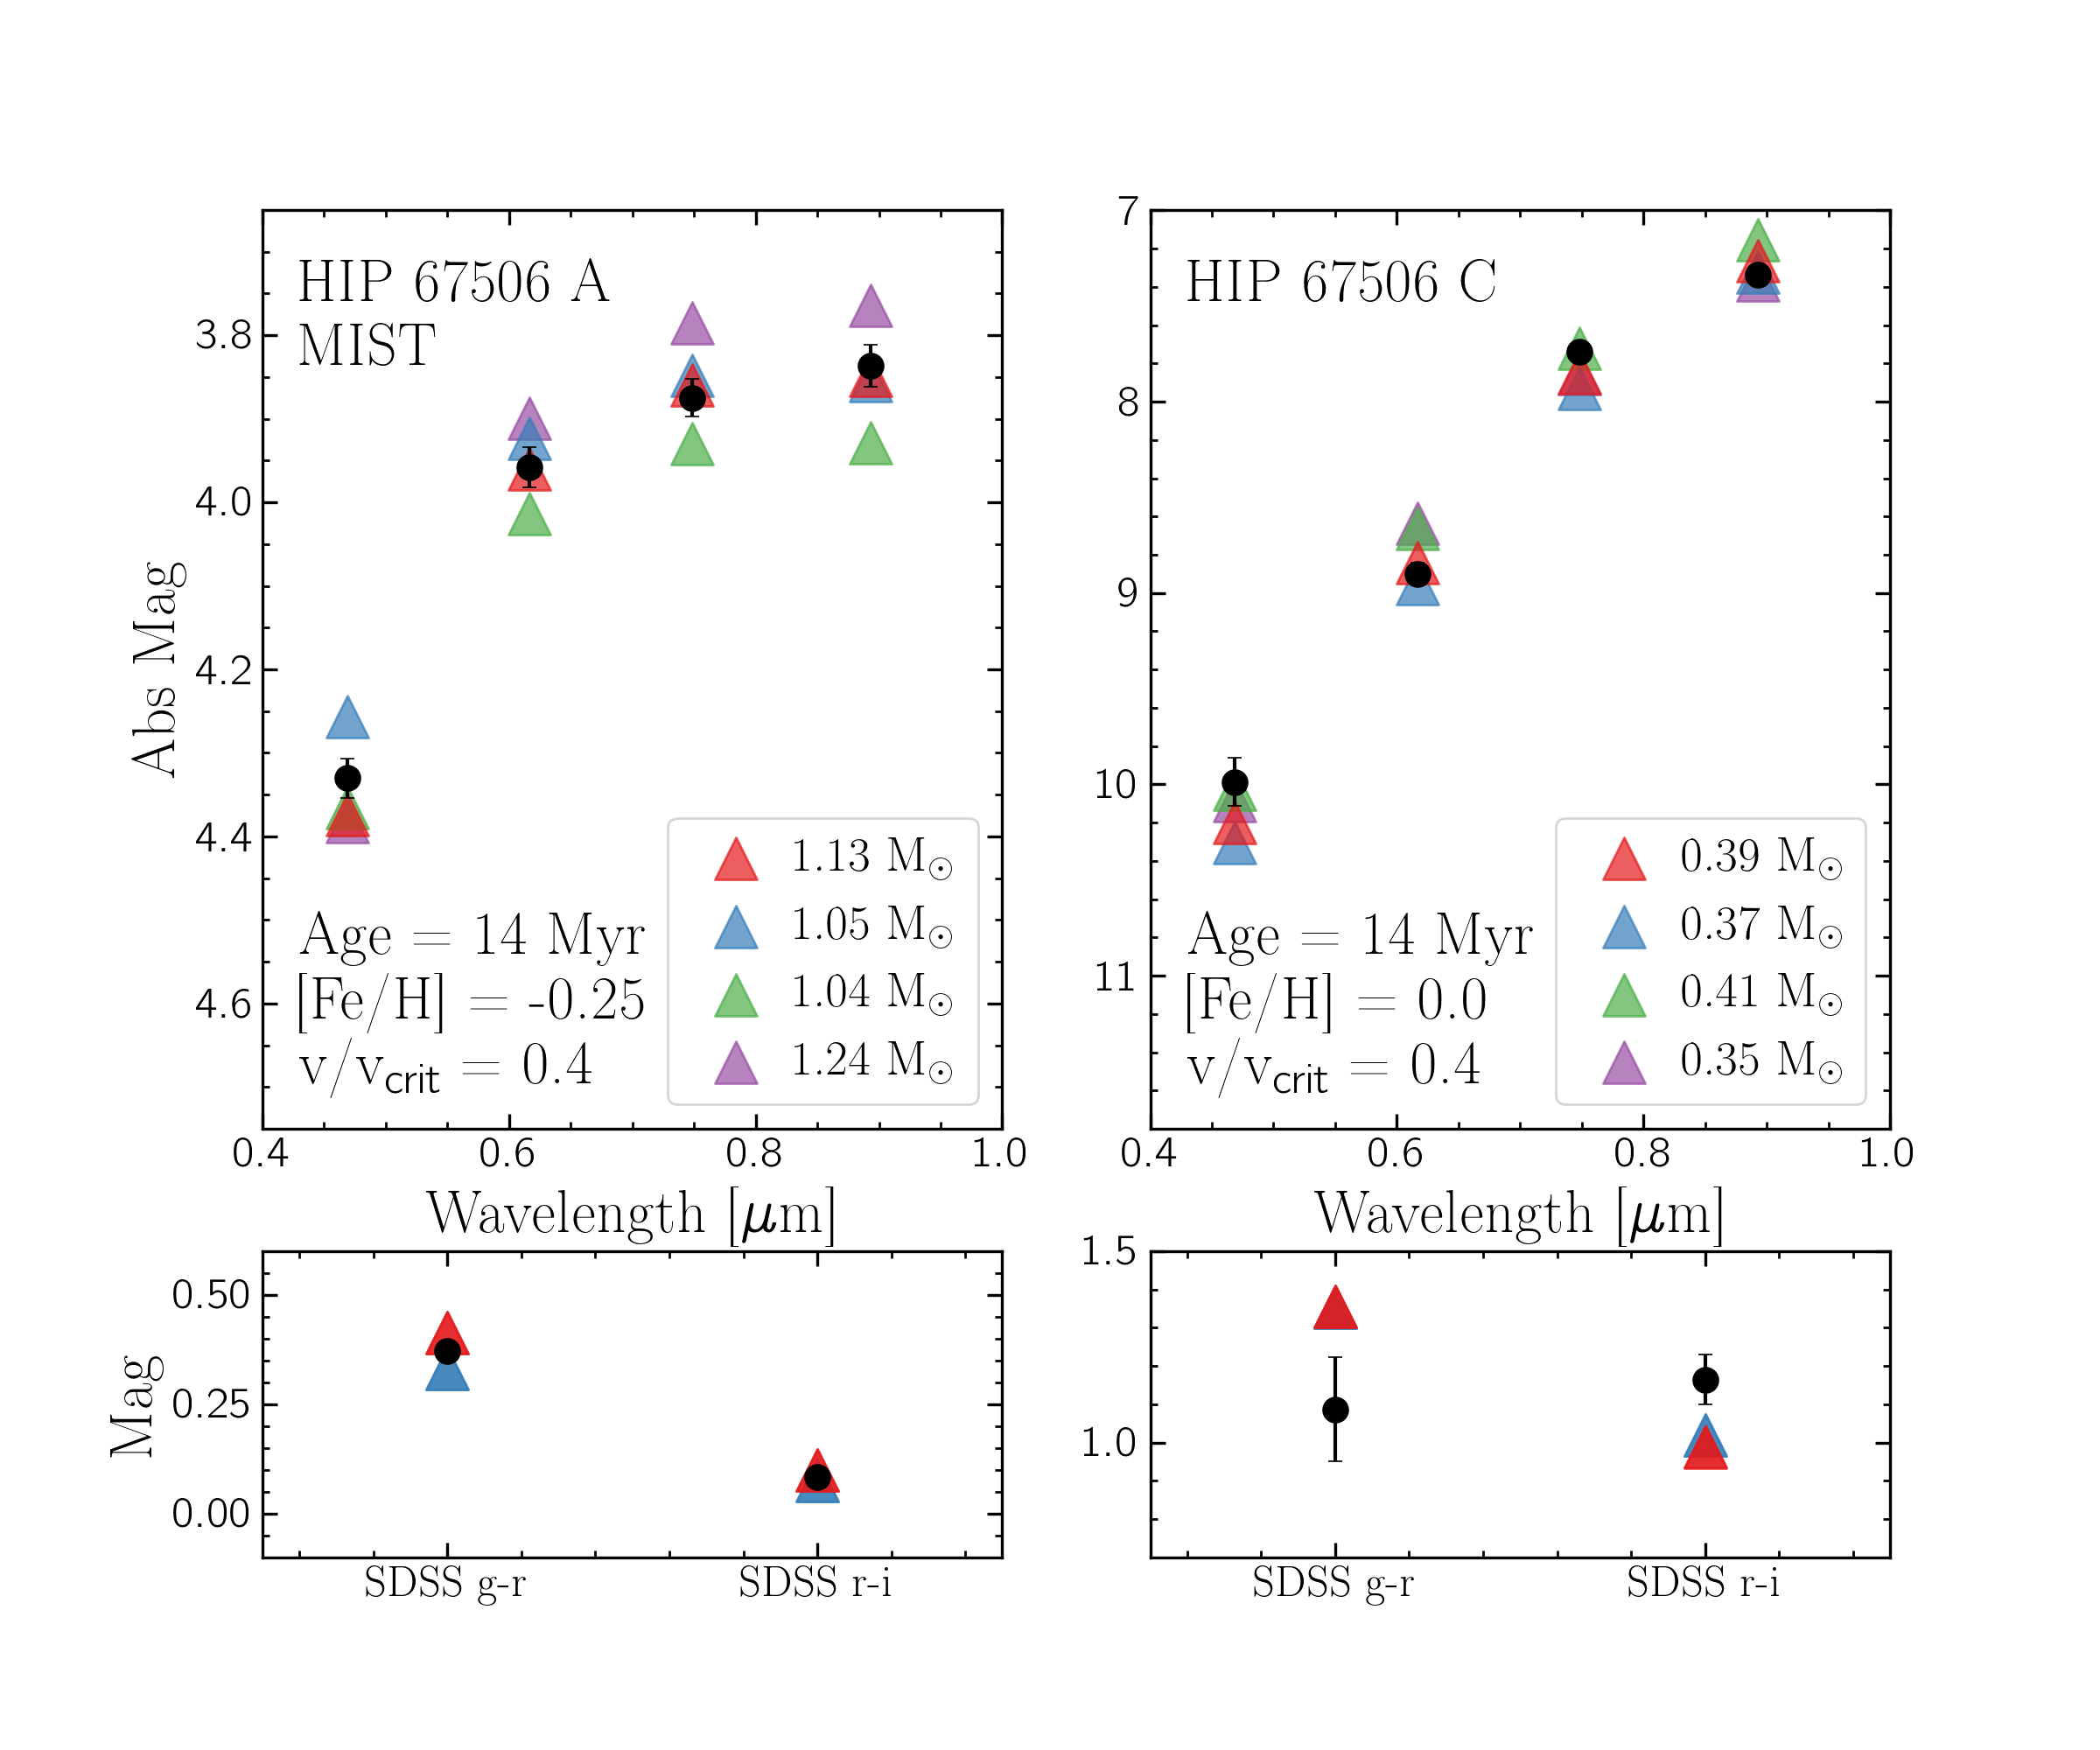

In [104]:
from matplotlib.gridspec import GridSpec
SDSS_filters = {'z':0.8931,'i':0.7481,'r':0.6165,'g':.4686}
f = [SDSS_filters['g'],SDSS_filters['r'],SDSS_filters['i'],SDSS_filters['z']]

A_ind = np.argsort(A_best_mist['chi2'])
C_ind = np.argsort(C_best_mist['chi2'])

N = 16
cmap = matplotlib.cm.get_cmap('Set1')
colors = cmap(np.linspace(0,1,N))

%matplotlib inline
fig = plt.figure(figsize=(12,10))
gs = GridSpec(nrows = 2, ncols = 2, height_ratios=[3, 1], width_ratios = [1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])

ax3 = fig.add_subplot(gs[1])
ax4 = fig.add_subplot(gs[3])

alpha = 0.7
for i in range(4):
    #for j in range(4)[::-1]:
    for j in [6,4,2,0]:
        if i == 0:
            ax1.scatter(f[i],A_best_mist[MIST_filter_columnnames[i]].loc[A_ind[j]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.2f}'.format(A_best_mist['star_mass'][A_ind[j]].item()) + ' M$_\odot$'
                        , zorder=8)
        else:
            ax1.scatter(f[i],A_best_mist[MIST_filter_columnnames[i]].loc[A_ind[j]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)

color = 'black'
for i in range(4):
    ax1.scatter(f[i],AM[i], zorder=10, color=color, s=100)
    ax1.errorbar(f[i],AM[i],yerr = eAM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
    
ax1.invert_yaxis()
ax1.set_xlim(0.4,1)
ax1.set_ylim(bottom = 4.75, top = 3.65)
ax1.set_ylabel('Abs Mag', fontsize=25)
ax1.set_xlabel('Wavelength [$\mu$m]', fontsize=25)

ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('MIST',xy = (0.05,0.83), xycoords = 'axes fraction', fontsize=25)

ax1.annotate('Age = '+str(int(np.round(
                    (10**(Amist_temp['log10_isochrone_age_yr'].loc[A_index_min])/1e6), 
                    decimals=0))) + ' Myr',
             xy = (0.05,0.19), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('[Fe/H] = '+str(A_best_mist['[Fe/H]_init'].loc[A_ind[0]]),
             xy = (0.05,0.12), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('v/v$_\mathrm{crit}$ = 0.4',xy = (0.05,0.05), xycoords = 'axes fraction', fontsize=25)


handles, labels = ax1.get_legend_handles_labels()
A_legend = ax1.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=20)





alpha = 0.7
for i in range(4):
    #for j in range(4)[::-1]:
    for j in [6,4,2,0]:
        if i == 0:
            ax3.scatter(f[i],C_best_mist[MIST_filter_columnnames[i]].loc[C_ind[j]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.2f}'.format(C_best_mist['star_mass'][C_ind[j]].item()) + ' M$_\odot$'
                        , zorder=8)
        else:
            ax3.scatter(f[i],C_best_mist[MIST_filter_columnnames[i]].loc[C_ind[j]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)
color = 'black'
for i in range(4):
    ax3.scatter(f[i],CM[i], zorder=10, color=color, s=100)
    ax3.errorbar(f[i],CM[i],yerr = eCM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)

handles, labels = ax3.get_legend_handles_labels()
C_legend = ax3.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=20)   

ax3.invert_yaxis()
ax3.set_ylim(bottom = 11.8)
ax3.set_xlim(0.4,1)
ax3.set_xlabel('Wavelength [$\mu$m]',fontsize=25)
ax3.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)


ax3.annotate('Age = '+str(int(np.round(
                    (10**(Amist_temp['log10_isochrone_age_yr'].loc[A_index_min])/1e6), 
                    decimals=0))) + ' Myr',
             xy = (0.05,0.19), xycoords = 'axes fraction', fontsize=25)
ax3.annotate('[Fe/H] = '+str(C_best_mist['[Fe/H]_init'].loc[C_ind[0]]),
             xy = (0.05,0.12), xycoords = 'axes fraction', fontsize=25)
ax3.annotate('v/v$_\mathrm{crit}$ = 0.4',xy = (0.05,0.05), xycoords = 'axes fraction', fontsize=25)
                   
zorder = [8,6,4,2]

i = 1
ax2.scatter(0,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(0,Acolorlist[i],yerr = Aecolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 0
ax2.scatter(1,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(1,Acolorlist[i],yerr = Aecolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ax2.scatter(0,A_best_mist[MIST_color_columnnames[1]].loc[A_ind[j]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
for j in range(4):
    ax2.scatter(1,A_best_mist[MIST_color_columnnames[0]].loc[A_ind[j]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
        
ax2.set_xlim(-0.5,1.5)
ax2.set_ylim(-0.1,0.6)
ax2.set_ylabel('Mag', fontsize=25)
ax2.set_xticks([0,1], labels = ['SDSS '+MIST_color_columnnames[::-1][k] for k in range(2)])


zorder = [8,6,4,2]
i = 1
ax4.scatter(0,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(0,Ccolorlist[i],yerr = Cecolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 0
ax4.scatter(1,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(1,Ccolorlist[i],yerr = Cecolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ax4.scatter(0,C_best_mist[MIST_color_columnnames[1]].loc[C_ind[j]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
for j in range(4):
    ax4.scatter(1,C_best_mist[MIST_color_columnnames[0]].loc[C_ind[j]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
        

ax4.set_xticks([0,1], labels = ['SDSS '+MIST_color_columnnames[::-1][k] for k in range(2)])
ax4.set_xlim(-0.5,1.5)
ax4.set_ylim(0.7,1.5)

#plt.savefig('MIST-photometry-color-fitting-constrainedage.png', dpi=300, bbox_inches='tight')


In [10]:
A_ind = np.argsort(A_best_mist['chi2'])
A_best_mist.reset_index(drop=True).loc[A_ind]

,index,EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],...,SDSS_g,SDSS_r,SDSS_i,SDSS_z,phase,g-r,r-i,chi2,vvcrit,feh
9780,1431288,187,7.15,1.130082,1.130080,3.766720,4.237429,0.275302,-0.25,-0.218016,...,4.374305,3.960242,3.859653,3.848309,-1.0,0.414063,0.100589,10.229619,0.0,-0.25
4214,606757,187,7.15,1.130082,1.130080,3.766720,4.237429,0.275302,-0.25,-0.218016,...,4.374305,3.960242,3.859653,3.848309,-1.0,0.414063,0.100589,10.229619,0.4,-0.25
9084,1328357,189,7.15,1.054570,1.054568,3.785526,4.255958,0.301996,-0.50,-0.473199,...,4.256394,3.923810,3.848383,3.853860,-1.0,0.332584,0.075427,18.374584,0.0,-0.50
3518,502508,189,7.15,1.054570,1.054568,3.785526,4.255958,0.301996,-0.50,-0.473199,...,4.256394,3.923810,3.848383,3.853860,-1.0,0.332584,0.075427,18.374584,0.4,-0.50
9083,1328356,188,7.15,1.043734,1.043732,3.780032,4.266309,0.265188,-0.50,-0.473195,...,4.365308,4.013264,3.929597,3.928952,-1.0,0.352044,0.083667,28.388821,0.0,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,399698,686,7.15,15.423652,15.054370,3.776426,0.711992,4.963959,-1.00,-0.969947,...,-7.484335,-7.758451,-7.818338,-7.847619,3.0,0.274116,0.059887,973002.297686,0.4,-1.00
3319,399697,685,7.15,15.422855,15.055482,3.784960,0.745660,4.964457,-1.00,-0.969948,...,-7.527756,-7.759195,-7.800756,-7.824583,3.0,0.231439,0.041561,973281.366136,0.4,-1.00
3316,399694,682,7.15,15.420024,15.059064,3.810551,0.846897,4.965687,-1.00,-0.969951,...,-7.651899,-7.756656,-7.741486,-7.750612,3.0,0.104757,-0.015170,973321.283385,0.4,-1.00
3318,399696,684,7.15,15.421990,15.056634,3.793492,0.779368,4.964910,-1.00,-0.969958,...,-7.570145,-7.759716,-7.782349,-7.800892,3.0,0.189571,0.022633,973467.317207,0.4,-1.00


In [72]:
C_ind = np.argsort(C_best_mist['chi2'])
C_best_mist_sorted = C_best_mist.loc[C_ind]
C_best_mist_sorted = C_best_mist_sorted.reset_index(drop=True)

A_ind = np.argsort(A_best_mist['chi2'])
A_best_mist_sorted = A_best_mist.loc[A_ind]
A_best_mist_sorted = A_best_mist_sorted.reset_index(drop=True)

C_best_mist_sorted

,index,EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],...,SDSS_g,SDSS_r,SDSS_i,SDSS_z,phase,g-r,r-i,chi2,vvcrit,feh
0,711297,153,7.15,0.387872,0.387872,3.547304,4.330485,-1.159813,0.0,0.041367,...,10.198460,8.841995,7.850601,7.261588,-1.0,1.356465,0.991394,26.477050,0.4,0.0
1,1536063,153,7.15,0.389381,0.389380,3.547577,4.330714,-1.157249,0.0,0.041367,...,10.187881,8.831197,7.842679,7.255180,-1.0,1.356684,0.988518,26.792536,0.0,0.0
2,1536062,152,7.15,0.373046,0.373046,3.544602,4.328012,-1.185085,0.0,0.041367,...,10.303320,8.948676,7.928886,7.324868,-1.0,1.354644,1.019790,37.272013,0.0,0.0
3,711296,152,7.15,0.372804,0.372803,3.544557,4.327916,-1.185448,0.0,0.041367,...,10.304934,8.950318,7.930054,7.325784,-1.0,1.354616,1.020264,37.586678,0.4,0.0
4,711298,154,7.15,0.414947,0.414947,3.551793,4.334541,-1.117224,0.0,0.041367,...,10.024023,8.663260,7.719415,7.155327,-1.0,1.360763,0.943845,57.855929,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11812,196866,807,7.15,15.394088,15.269313,3.625576,-0.012344,5.091039,-2.0,-1.934761,...,-6.282760,-7.594199,-8.096035,-8.371592,4.0,1.311439,0.501836,439401.768852,0.4,-2.0
11813,196865,806,7.15,15.394074,15.269392,3.625555,-0.012825,5.091437,-2.0,-1.934782,...,-6.283254,-7.594990,-8.096952,-8.372584,4.0,1.311736,0.501962,439452.144280,0.4,-2.0
11814,196864,805,7.15,15.394053,15.269509,3.625542,-0.013109,5.091672,-2.0,-1.934903,...,-6.283522,-7.595444,-8.097489,-8.373169,4.0,1.311922,0.502045,439481.611012,0.4,-2.0
11815,196863,804,7.15,15.394004,15.269793,3.625524,-0.013463,5.091962,-2.0,-1.934889,...,-6.283861,-7.596013,-8.098152,-8.373888,4.0,1.312152,0.502139,439518.013871,0.4,-2.0


<IPython.core.display.Javascript object>


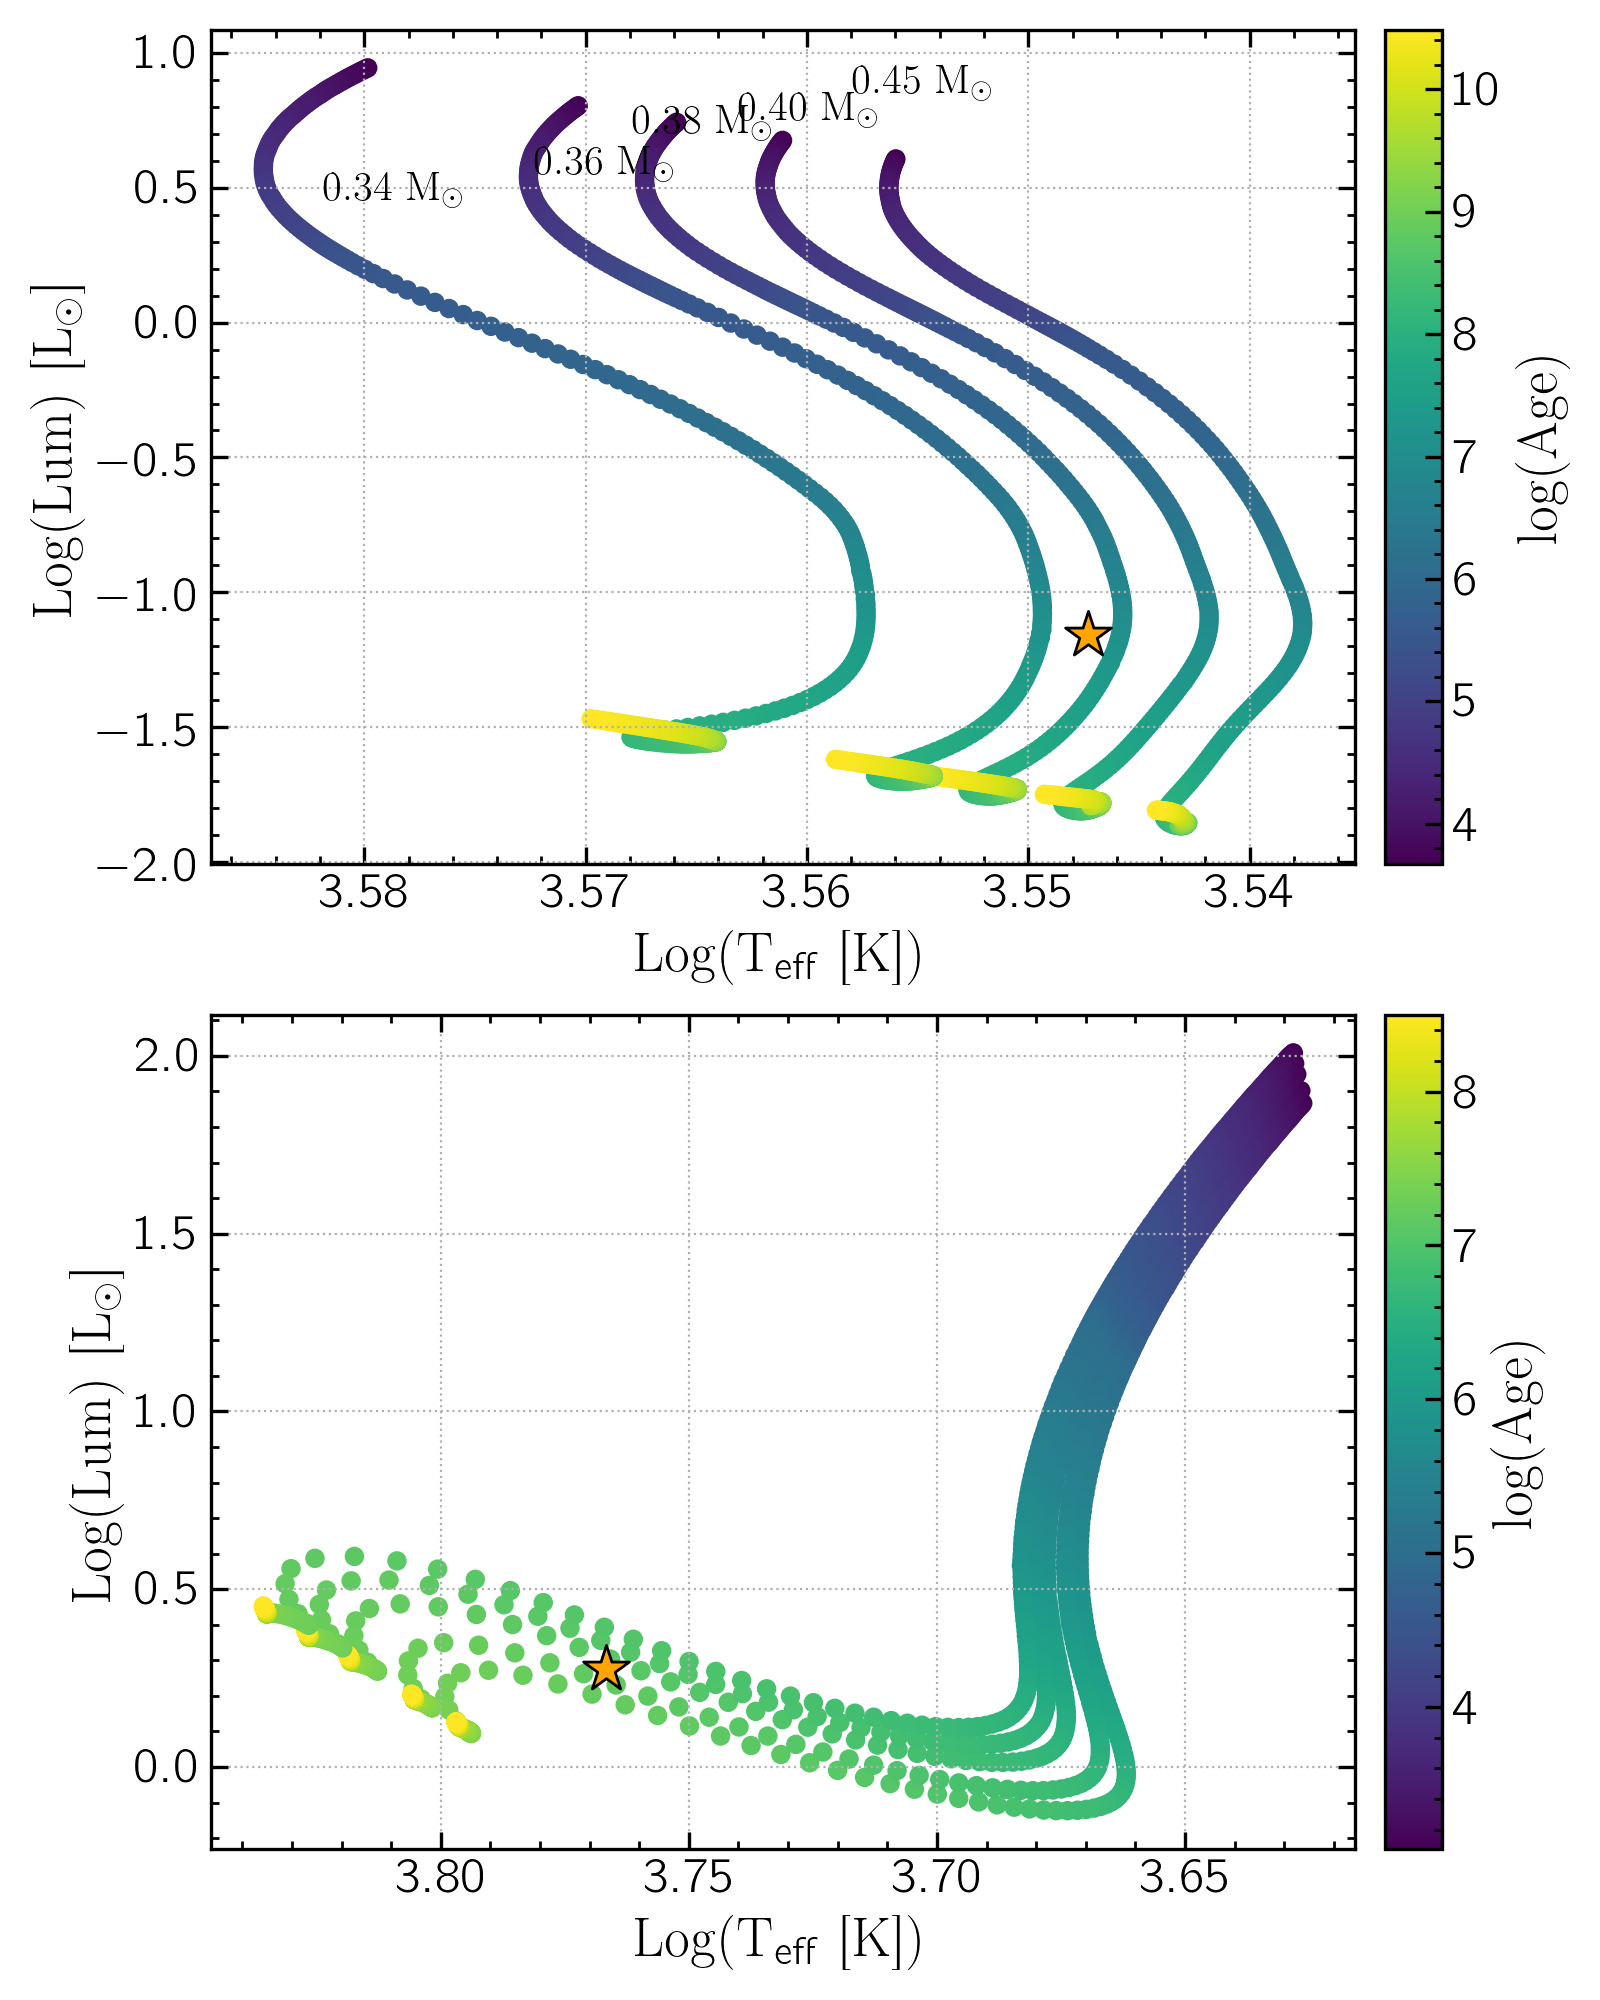

In [92]:
directory = 'MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS/'
os.system('ls '+directory+'* > list')
with open('list') as z:
    ff = z.read().splitlines()
Cmasses = ['0.34','0.36','0.38','0.40','0.45'][::-1]
tracks = []
for f in ff:
    for i in range(len(Cmasses)):
        if Cmasses[i].replace('0.','000') in f:
            tracks.append(f)
            
directory = 'MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS/'
os.system('ls '+directory+'* > list')
with open('list') as z:
    ff = z.read().splitlines()
Amasses = ['1.06','1.10','1.16','1.20','1.24'][::-1]
Atracks = []
for f in ff:
    for i in range(len(Amasses)):
        if Amasses[i].replace('1.','001') in f:
            Atracks.append(f)

#MistTrack064 = pd.read_table('MIST-evtrack-0006400M-mh-m15.track.eep', delim_whitespace=True, header=11)
C_MistTrack = pd.read_table(tracks[0], delim_whitespace=True, header=11)
columns = C_MistTrack.columns[1:]

x_label_offsets = [0.003,-0.005,-0.013,-0.0165,-0.025]
y_label_offsets = [0,-0.1,-0.15,-0.3,-0.4]

%matplotlib inline
fig = plt.figure(figsize=(8,10))
gs = GridSpec(nrows = 2, ncols = 2, width_ratios = [1, 0.05], height_ratios = [1,1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])
cax1 = fig.add_subplot(gs[1])
cax2 = fig.add_subplot(gs[3])

cmap = 'viridis'
for i,track in enumerate(tracks):
    C_MistTrack = pd.read_table(track, delim_whitespace=True, names=columns, comment='#')
    ind = np.where(np.log10(C_MistTrack['star_age']) < 10.5)[0]
    im1 = ax1.scatter(C_MistTrack['log_Teff'][ind],C_MistTrack['log_L'][ind], 
            c=np.log10(C_MistTrack['star_age'][ind]), cmap=cmap)
    #ax1.annotate(Cmasses[i]+' M$_\odot$',
    #             xy=(3.577+x_label_offsets[i], 0.85+y_label_offsets[i]),
    #             xycoords = 'data', fontsize=15)
    ax1.annotate(Cmasses[i]+' M$_\odot$',
                 xy=(C_MistTrack['log_Teff'][ind][0] + 0.002, 0.85+y_label_offsets[i]),
                 xycoords = 'data', fontsize=15)
    
    A_MistTrack = pd.read_table(Atracks[i], delim_whitespace=True, names=columns, comment='#')
    ind = np.where(np.log10(A_MistTrack['star_age']) < 8.5)[0]
    im2 = ax2.scatter(A_MistTrack['log_Teff'][ind],A_MistTrack['log_L'][ind], 
            c=np.log10(A_MistTrack['star_age'][ind]), cmap=cmap)
    ax2.annotate(Amasses[i]+' M$_\odot$',
                 xy=(3.577+x_label_offsets[i], -0.94+y_label_offsets[i]),
                 xycoords = 'data', fontsize=15)
    
#cbar = ax1.colorbar()
cbar1 = fig.colorbar(im1, cax=cax1)
cbar2 = fig.colorbar(im2, cax=cax2)

ax1.scatter(C_best_mist_sorted['log_Teff'].loc[0],C_best_mist_sorted['log_L'].loc[0], 
            marker='*', color='orange',s=300, edgecolor='black')

ax2.scatter(A_best_mist_sorted['log_Teff'].loc[0],A_best_mist_sorted['log_L'].loc[0], 
            marker='*', color='orange',s=300, edgecolor='black')

#ax2.set_xlim()

ax1.invert_xaxis()
ax1.set_xlabel('Log(T$_\mathrm{eff}$ [K])')
ax2.invert_xaxis()
ax2.set_xlabel('Log(T$_\mathrm{eff}$ [K])')
ax1.set_ylabel('Log(Lum) [L$_\odot$]')
ax2.set_ylabel('Log(Lum) [L$_\odot$]')
cbar1.set_label(r'log(Age)')
cbar2.set_label(r'log(Age)')
ax1.grid(ls=':')
ax2.grid(ls=':')
plt.tight_layout()

In [16]:
#pickle.dump([ages_mins,chimins],open('ages-chimins-from-keeping-age-constrained.pkl','wb'))
#pickle.dump([Cmist_temp,Amist_temp],open('bestfit-MIST-age-models-from-keeping-age-constrained.pkl','wb'))
ages_mins,chimins = pickle.load(open('ages-chimins-from-keeping-age-constrained.pkl','rb'))

bestage = '9.75'
ff = 'chi2-matrix-constrainedage-'+bestage+'.npy'
summedchi = np.load(ff)

In [18]:
a = np.where(summedchi == np.min(summedchi))
A_index_min = a[1][0]
C_index_min = a[0][0]

age = float(bestage)
Amist = pd.read_csv('MIST_models_master-A.csv')
Cmist = pd.read_csv('MIST_models_master-C.csv')
Aind = np.where(np.isclose(Amist['log10_isochrone_age_yr'],age))[0]
Cind = np.where(np.isclose(Cmist['log10_isochrone_age_yr'],age))[0]
Cmist_temp = Cmist.loc[Cind]
Cmist_temp = Cmist_temp.reset_index()
Amist_temp = Amist.loc[Aind]
Amist_temp = Amist_temp.reset_index()
a, A_index_min, C_index_min


((array([22871, 22871]), array([ 9619, 21469])), 9619, 22871)

3.7802196056908897 0.2733337704034123
3.580004253460622 -1.1970585410158083


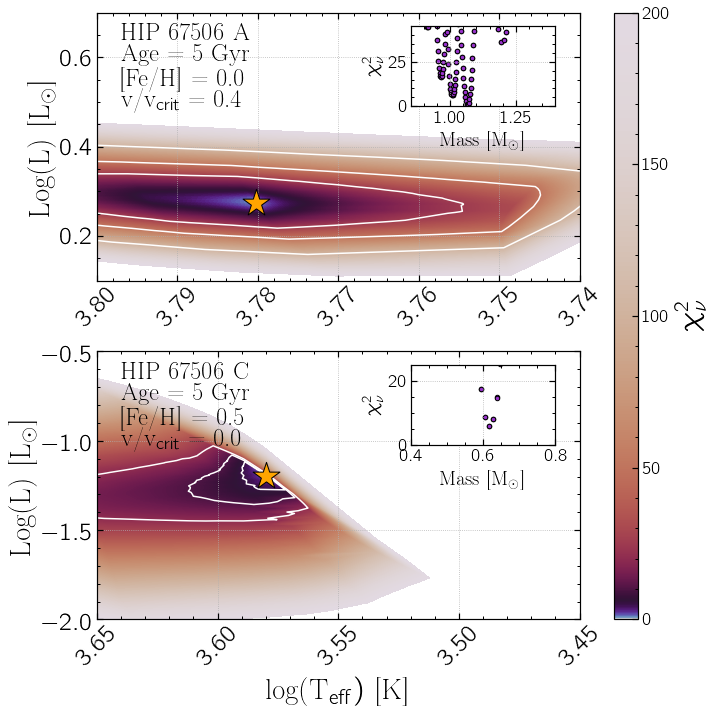

In [20]:
import matplotlib
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.gridspec import GridSpec
l_f = LogFormatter(10)

cmap='twilight'

plt.style.use('magrathea')
%matplotlib inline
fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows = 2, ncols = 2, width_ratios = [1, 0.05], height_ratios = [1,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
cax = fig.add_subplot(gs[:,1])
#ax_main = 

ax1.grid(ls=':')
levels = np.linspace(0,200,1000)
im = ax1.tricontourf(Amist_temp['log_Teff'], Amist_temp['log_L'], Amist_temp['chi2']/6, 
                     levels = levels, cmap = cmap, 
                norm=matplotlib.colors.LogNorm())
cbarticks = [0,50,100,150,200]
#cbar = plt.colorbar(im, ticks=cbarticks, ax=cax)
#fig.colorbar(im, ax=[ax1,ax2])
cbar = fig.colorbar(im, cax=cax, ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = ax1.tricontour(Amist_temp['log_Teff'], Amist_temp['log_L'], Amist_temp['chi2']/6, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

ax1.scatter(Amist_temp['log_Teff'][A_index_min], Amist_temp['log_L'][A_index_min], color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')
print(Amist_temp['log_Teff'][A_index_min], Amist_temp['log_L'][A_index_min])
ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('Age = '+str(int(np.round(
                    (10**(Amist_temp['log10_isochrone_age_yr'].loc[A_index_min])/1e9), 
                    decimals=1))) + ' Gyr',
             xy = (0.05,0.82), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('[Fe/H] = '+str(Amist_temp['feh'].loc[A_index_min]),
             xy = (0.05,0.73), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('v/v$_\mathrm{crit}$ = '+str(Amist_temp['vvcrit'].loc[A_index_min])
             ,xy = (0.05,0.65), xycoords = 'axes fraction', fontsize=25)

ax1.set_xlim(3.74,3.80)
ax1.set_ylim(0.1,0.7)
ax1.invert_xaxis()
cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
#ax1.set_xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
ax1.tick_params(axis='x', labelsize=25, rotation=45)
#plt.xticks(fontsize=25, rotation=45)
ax1.set_ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
#plt.yticks(fontsize=25)
ax1.tick_params(axis='y', labelsize=25)

######################## inset axes #######
ax = ax1
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(Amist_temp['star_mass'], Amist_temp['chi2']/5, 
              marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('Mass [M$_\odot$]')
axins.set_ylabel(r'$\chi_\nu^2$')
axins.set_xlim(0.85,1.4)
axins.set_ylim(0,45)

##################################### ax2
ax2.grid(ls=':')
levels = np.linspace(0,1000,1000)
im = ax2.tricontourf(Cmist_temp['log_Teff'], Cmist_temp['log_L'], Cmist_temp['chi2']/6, 
                     levels = levels, cmap = cmap, 
                norm=matplotlib.colors.LogNorm())
#cbarticks = [100,500,1000]
#cbar = plt.colorbar(im,ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = ax2.tricontour(Cmist_temp['log_Teff'], Cmist_temp['log_L'], Cmist_temp['chi2']/6, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

ax2.scatter(Cmist_temp['log_Teff'][C_index_min], Cmist_temp['log_L'][C_index_min], color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')
print(Cmist_temp['log_Teff'][C_index_min], Cmist_temp['log_L'][C_index_min])

ax2.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax2.annotate('Age = '+str(int(np.round(
                    (10**(Cmist_temp['log10_isochrone_age_yr'].loc[C_index_min])/1e9), 
                    decimals=1))) + ' Gyr',
             xy = (0.05,0.82), xycoords = 'axes fraction', fontsize=25)
ax2.annotate('[Fe/H] = '+str(Cmist_temp['feh'].loc[C_index_min]),
             xy = (0.05,0.73), xycoords = 'axes fraction', fontsize=25)
ax2.annotate('v/v$_\mathrm{crit}$ = '+str(Cmist_temp['vvcrit'].loc[C_index_min])
             ,xy = (0.05,0.65), xycoords = 'axes fraction', fontsize=25)

ax2.set_xlim(3.45,3.65)
ax2.set_ylim(-2,-0.5)
ax2.invert_xaxis()
#cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
ax2.set_xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
ax2.tick_params(axis='x', labelsize=25, rotation=45)
ax2.set_ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
ax2.tick_params(axis='y', labelsize=25)

######################## inset axes #######
ax = ax2
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(Cmist_temp['star_mass'], Cmist_temp['chi2']/6, 
              marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('Mass [M$_\odot$]')
axins.set_ylabel(r'$\chi_\nu^2$')
axins.set_xlim(0.4,0.8)
axins.set_ylim(0,25)
             


plt.tight_layout()

#plt.savefig(
#.          'MIST_models_chi2MAP_BOTH_primaryas_M0V-mh_m05_wchi2plot-WAgesConstrained.png',
#           dpi=300,
#           bbox_inches = 'tight')